In [1]:
%matplotlib inline
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Get data
print("Getting training data")
csvtrain = np.genfromtxt ('./csv/train.csv', delimiter=",")
# Remove title line
csvtrain = csvtrain[1:,:]
# Select pixels and labels
labels = csvtrain[:,0]
pixels = csvtrain[:,1:]

Getting training data


In [3]:
# Sampling %
SAMPLING_RATE = 1
print("Sampling training data - ",SAMPLING_RATE)
sample = np.random.randint(csvtrain.shape[0], size=int(csvtrain.shape[0]*SAMPLING_RATE))
X = pixels[sample,:]
Y = labels[sample]

Sampling training data -  1


In [4]:
# PCA
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

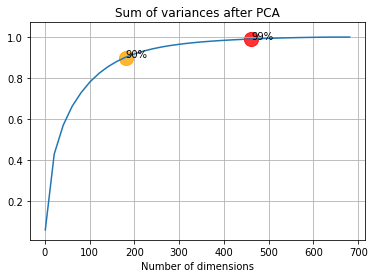

In [5]:
#Study of first 100 PCA components number
pca_stats=[]
ninetyNineIsFound = False
ninetyIsFound = False
for k in range(1,701,20):
    pca = decomposition.PCA(n_components=k)
    pca.fit(X_scaled)
    pca_stats.append([k,pca.explained_variance_ratio_.sum()])
    if(not ninetyIsFound and pca.explained_variance_ratio_.sum()>=0.9):
        xNinety = k
        ninetyIsFound = True
    if(not ninetyNineIsFound and pca.explained_variance_ratio_.sum()>=0.99):
        xNinetyNine = k
        ninetyNineIsFound = True
plt.title('Sum of variances after PCA')
plt.xlabel('Number of dimensions')
pca_stats = np.array(pca_stats)
plt.plot(pca_stats[:,0],pca_stats[:,1])
plt.scatter(xNinety,0.9, c='orange', alpha=0.8,s=200)
plt.scatter(xNinetyNine,0.99, c='red', alpha=0.8, s=200)
plt.text(xNinety, 0.9, '90%')
plt.text(xNinetyNine, 0.99, '99%')
plt.grid(True)
plt.show()

In [7]:
pca = decomposition.PCA(n_components=480) #xNinetyNine
pca.fit(X_scaled)
#print("We choose ",xNinetyNine," PCA components (",pca.explained_variance_ratio_.sum()*100,"% of the variance)")

PCA(copy=True, iterated_power='auto', n_components=480, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# Projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

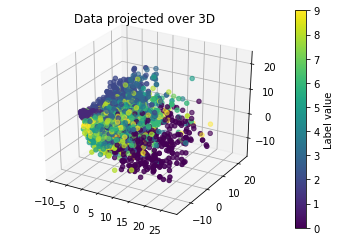

In [8]:
# afficher chaque observation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p=ax.scatter(X_projected[:, 0], X_projected[:, 1],X_projected[:, 2],c=Y)
plt.title('Data projected over 3D')
fig.colorbar(p,label='Label value')

In [9]:
# Splitting 80%
xtrain, xtest, ytrain, ytest = train_test_split(X_projected,Y,train_size=0.8,test_size=0.2)

Fitting with k= 1
Fitting with k= 2
Fitting with k= 3
Fitting with k= 4
Fitting with k= 5
Fitting with k= 6
Fitting with k= 7
Fitting with k= 8
Fitting with k= 9
Fitting with k= 10
Minimum error with k= 1


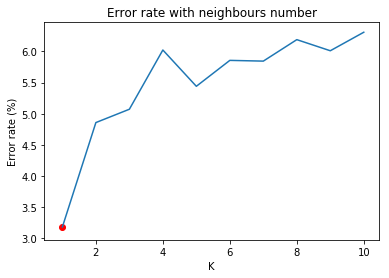

In [10]:
errors = []
for k in range(1,11):
    print("Fitting with k=",k)
    knn = neighbors.KNeighborsClassifier(k)
    knn.fit(xtrain, ytrain)
    errors.append([k , 100*(1-knn.score(xtest, ytest))])
errors = np.array(errors)
MIN_ERR_K = int(errors[:,0][np.argmin(errors[:,1])])
print("Minimum error with k=",MIN_ERR_K)
plt.plot(errors[:,0],errors[:,1])
plt.scatter(MIN_ERR_K,np.min(errors[:,1]),c='red')
plt.ylabel('Error rate (%)')
plt.xlabel("K")
plt.title('Error rate with neighbours number')
plt.show()

In [ ]:
# Re-process data
X = pixels
Y = labels
#std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
#pca = decomposition.PCA(n_components=3) #xNinetyNine
#pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)
xtrain, ytrain = X,Y #No test now
# Model is validated
# Now train with full dataset
print("Training K-NN on full dataset")
xtrain = pixels[:,:]
ytrain = labels[:]
knn = neighbors.KNeighborsClassifier(n_neighbors=3) #MIN_ERR_K
knn.fit(xtrain, ytrain)

In [13]:
# Get data
print("Getting testing data")
csvpred = np.genfromtxt ('./csv/test.csv', delimiter=",")
# Remove title line
xpred = csvpred[1:,:]

Getting testing data
Predicting


KeyboardInterrupt: 

In [ ]:
# Predict
print("Predicting")
ypred = knn.predict(xpred).astype(int)
# Save in file with index
print("Indexing")
indexes = np.arange(1,ypred.shape[0]+1)
results = np.vstack([indexes,ypred])
print("Transposing")
results = results.transpose()
print("Saving")
np.savetxt ('./csv/submission.csv', results, delimiter=",",fmt="%i",header="ImageId,Label")

Predicting
